In [48]:
import tweepy
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())




In [49]:
sentiments = []
target_user = ('@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@NYT')

In [50]:

for user in target_user:
    counter = 0 
    public_tweets = api.user_timeline(user, count = 100)
    for tweet in public_tweets: 
        
        compound = analyzer.polarity_scores(tweet['text'])['compound']
        pos = analyzer.polarity_scores(tweet['text'])['pos']
        neu = analyzer.polarity_scores(tweet['text'])['neu']
        neg = analyzer.polarity_scores(tweet['text'])['neg']
        tweets_ago = counter
        tweet_text = tweet['text']
            
        sentiments.append({
        "Username": user,
        "Date": tweet['created_at'],
        "Compound Score": compound,
        "Positive Score": pos,
        "Neurtal Score": neu,
        "Negative Score": neg,
            "Tweets Ago": counter,
            "Tweet Text": tweet_text
    })
    counter = counter + 1

TweepError: Not authorized.

In [53]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments 

,Compound Score,Date,Negative Score,Neurtal Score,Positive Score,Tweet Text,Tweets Ago,Username
0,-0.5423,Tue Jul 31 07:51:08 +0000 2018,0.226,0.774,0.000,Social media and reality TV is 'bad for body i...,0,@BBCNews
1,0.8126,Tue Jul 31 07:32:12 +0000 2018,0.000,0.748,0.252,RT @bbcweather: Wednesday: Rather cloudy acros...,0,@BBCNews
2,-0.5192,Tue Jul 31 07:01:52 +0000 2018,0.172,0.828,0.000,RT @BBCBenThompson: As UK prepares to leave EU...,0,@BBCNews
3,0.5267,Tue Jul 31 06:49:12 +0000 2018,0.000,0.764,0.236,Liverpool 'one or two players from winning Pre...,0,@BBCNews
4,0.2960,Tue Jul 31 06:34:03 +0000 2018,0.000,0.804,0.196,Dixons Carphone admits data breach now affects...,0,@BBCNews
5,-0.6369,Tue Jul 31 05:43:00 +0000 2018,0.296,0.704,0.000,News Daily: Aid sector abuse and North Korea m...,0,@BBCNews
6,0.0000,Tue Jul 31 05:25:52 +0000 2018,0.000,1.000,0.000,Andy Murray beats Mackenzie McDonald in Washin...,0,@BBCNews
7,-0.7650,Tue Jul 31 05:16:07 +0000 2018,0.485,0.515,0.000,IS claims fatal Tajik attack on foreign cyclis...,0,@BBCNews
8,0.0000,Tue Jul 31 03:48:56 +0000 2018,0.000,1.000,0.000,Lombok earthquake: 543 hikers evacuated from M...,0,@BBCNews
9,-0.1431,Tue Jul 31 03:06:20 +0000 2018,0.064,0.936,0.000,RT @SallyBundockBBC: As the UK prepares to lea...,0,@BBCNews


In [51]:
news_sentiments.to_csv("Twitter_news_sentiment.csv", index = False)

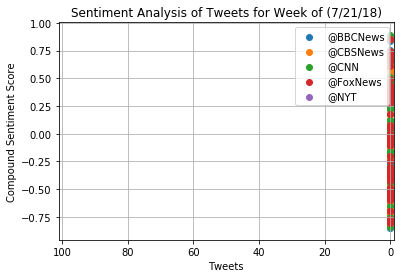

In [52]:
#scatter plot of compounded sentiment score
plt.xlim(101, -1)
for user in target_user:
    dataframe = news_sentiments.loc[news_sentiments['Username'] == user]
    plt.scatter(dataframe["Tweets Ago"], dataframe['Compound Score'],label = user)
    

plt.title('Sentiment Analysis of Tweets for Week of (7/21/18)')
plt.xlabel('Tweets')
plt.ylabel('Compound Sentiment Score')
plt.grid()
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('News_sentiment_scatter_plot.png')
plt.show()

In [37]:
average_sentiment = news_sentiments.groupby('Username')['Compound Score'].mean()
average_sentiment

Username
@BBCNews   -0.139267
@CBSNews   -0.067714
@CNN       -0.055193
@FoxNews   -0.016779
Name: Compound Score, dtype: float64

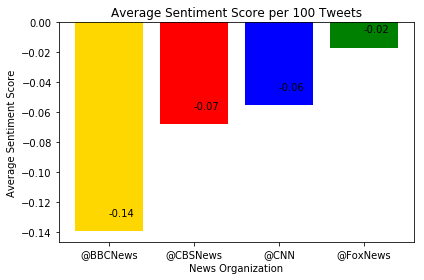

In [41]:
#bar graph visualizing distribution of the mean 
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index 
count = 0 
for sentiment in average_sentiment: 
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color =['gold', 'r', 'b', 'g','y'])
plt.title('Average Sentiment Score per 100 Tweets')
plt.xlabel('News Organization')
plt.ylabel('Average Sentiment Score')
plt.savefig('Sentiment_avg.png')
plt.tight_layout()
plt.show()